### MAI THỊ THẢO LY - 20280064 - 20KHDL

# Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)

In [71]:
# mount data from google drive to colab
#from google.colab import drive
#drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time
import seaborn as sns

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [72]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [73]:
path = "final_house_loan.csv" # Path to your file

df = read_dataset(path)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


## Data Analysis

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income (USD)'}>],
       [<AxesSubplot:title={'center':'Property Age'}>,
        <AxesSubplot:title={'center':'Property Price'}>]], dtype=object)

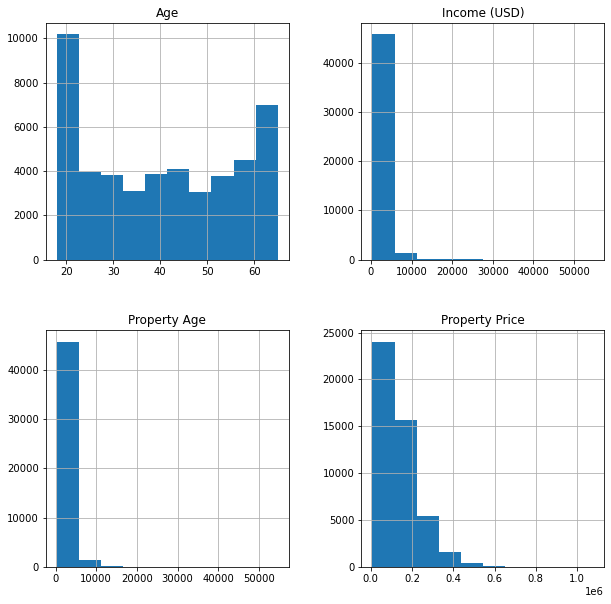

In [74]:
df.hist(column=['Age','Income (USD)','Property Age','Property Price'],figsize=(10,10))

<AxesSubplot:xlabel='Age', ylabel='Count'>

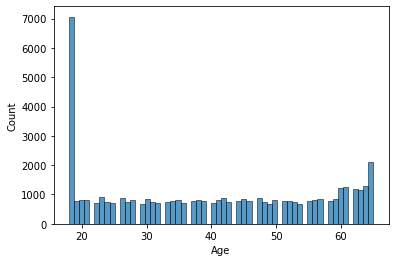

In [75]:
sns.histplot(x="Age", data=df, bins=60)

<AxesSubplot:xlabel='count', ylabel='Gender'>

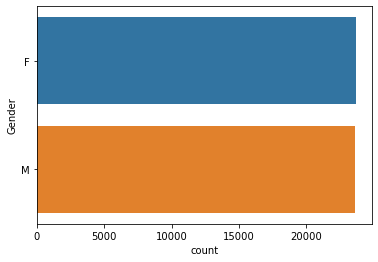

In [76]:
sns.countplot(y='Gender',data=df)

<AxesSubplot:xlabel='count', ylabel='Income Stability'>

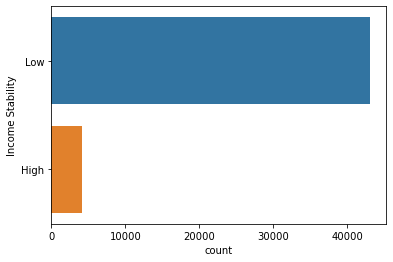

In [77]:
sns.countplot(y='Income Stability',data=df)

<AxesSubplot:xlabel='count', ylabel='Property Location'>

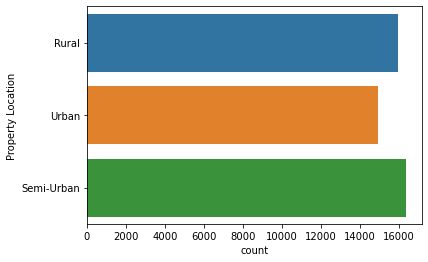

In [78]:
sns.countplot(y='Property Location',data=df)

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

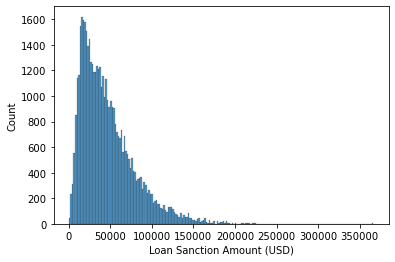

In [80]:
sns.histplot(x="Loan Sanction Amount (USD)", data=df, bins=200)

In [81]:
# Null checking
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [82]:
df.shape

(47297, 8)

## Preprocessing

In [50]:
def preprocessing_data(df):
    # Income (USD) and Property Age: use fillna() to insert missing values with mean data value
    # Income Stability and Property Location: use fillna() to insert missing values with pre (fill) value data
    df['Income (USD)'] = df['Income (USD)'].fillna(df['Income (USD)'].mean())
    df['Income Stability'] = df['Income Stability'].fillna(method='ffill')
    df['Property Age'] = df['Property Age'].fillna(df['Property Age'].mean())
    df['Property Location'] = df['Property Location'].fillna(method='ffill')
    return df

In [51]:
# --- fill missing data
print("Sample\n",df.isnull().sum())
print("Sample size:", len(df))
df = preprocessing_data(df.copy())
print("\nNot null sample\n",df.isnull().sum())
print("Not null sample size:", len(df))

Sample
 Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64
Sample size: 47297

Not null sample
 Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64
Not null sample size: 47297


## Feature Engineering

In [1]:
def normalize_data(df):
    normalized_data = df.copy()
    normalized_data["Gender"] = normalized_data["Gender"].astype("category").cat.codes
    normalized_data["Income Stability"] = normalized_data["Income Stability"].astype("category").cat.codes
    normalized_data["Property Location"] = normalized_data["Property Location"].astype("category").cat.codes
    display(normalized_data.head())
    display(normalized_data.corr())
    return normalized_data

In [2]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

NameError: name 'df' is not defined

# Apply machine learning model

## Train-test split

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [55]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    X =df.iloc[:,0:6]
    y = df.iloc[:,7]
    return X, y

X, y = prepare_X_y(df)

In [56]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [57]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33107, 6)
Test:(14190, 6)


## Basic Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)   
    model.fit(X,y)
    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  22623.068794175044
mean absolute error of linear model on test set  22427.70476491982
[   173.9846128     -78.29274335     29.93409907 -13951.32352438
    -21.69734625    -14.14010949]

40990.58039022677


In [59]:
from sklearn import linear_model
def build_lasso_model(X, y):
    
    model = linear_model.LassoCV() #cv=5, random_state=0
    model=model.fit(X,y)
    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  22812.45011786268
mean absolute error of linear model on test set  22618.89944602703
[ 0.          0.          8.04010557 -0.          0.          0.        ]

25728.815623681352


In [60]:
from sklearn import linear_model
from numpy import arange


def build_ridge_model(X, y):
    model = linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
    model.fit(X,y)

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  22624.025129630445
mean absolute error of linear model on test set  22428.939580799553
[   174.0157557     -78.23968977     29.9302578  -13944.69273944
    -21.70291836    -14.12857465]

41006.786762416596


In [61]:
from sklearn import linear_model

def build_elastic_model(X, y):
    model = linear_model.ElasticNetCV() #cv=5, random_state=0
    model.fit(X,y)
    
    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  22813.96507139252
mean absolute error of linear model on test set  22620.87270893601
[ 0.          0.          4.12158238 -0.          3.90542515  0.        ]

25763.150168079825


## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [21]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)

# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  22370.775713859523
mean absolute error of linear model (with poly transform) on test set  22169.871369326924


##### Polynomial of order 2 compared with the previous results has the average absolute error of the linear model on the train set and test set is the lowest. This proves that the linear model (with poly transform) is more efficient than .

In [23]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(9, include_bias=False), LinearRegression())
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)

# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  24793.0971507629
mean absolute error of linear model (with poly transform) on test set  25634.35796920752


#### When increasing degree gradually, the absolute average error of the linear model on the train and the test set gives worse results than before. Besides, if the increase is too large, the processing speed will be very slow or unable to run to give results.
